In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(flowCore)

In [3]:
path <- "../data/AMJ_5L_Costim.fcs"
f <- read.FCS(path, transformation=TRUE)
comp <- spillover(f)[[1]]
fc <- compensate(f, comp)
lgcl <- estimateLogicle(fc, channels = c(
    'Blue B-A',
    'Blue A-A',
    'Violet H-A',
    'Violet G-A',
    'Red C-A',
    'Red B-A',
    'Red A-A',
    'Green E-A',
    'Green D-A',
    'Green C-A',
    'Green A-A'
    ))
ft <- transform(fc, lgcl)
sf <- sampleFilter(filterId="mySampleFilter", size=10000) 
x <- Subset(ft, filter(ft, sf))
summary(x) 

FSC-A     FSC-H     FSC-W     SSC-A     SSC-H     SSC-W     Blue B-A  
Min.      9913.92  10027.00  60568.87   1889.55   1892.00  62665.24 -0.5741971
1st Qu.  84755.23  68108.00  75415.82  32418.36  28735.50  72134.22  0.6960464
Median  106348.32  87778.50  78376.83  45472.05  39308.00  73577.05  0.9891582
Mean    115866.21  93258.98  81464.41  73616.25  58729.79  79200.43  1.2327187
3rd Qu. 133339.52 111777.50  82937.91  78029.34  61045.75  78344.92  1.3415428
Max.    262143.00 262017.00 187179.66 262143.00 256021.00 262143.00  4.0689019
        Blue A-A   Violet H-A Violet G-A Red C-A    Red B-A    Red A-A    
Min.    -1.0764310 -0.1684866 -0.2484936 -1.1111191 -1.1862190 -0.07811711
1st Qu.  0.9121892  0.5384266  1.4912286  0.7289834  0.5908742  0.69295177
Median   1.0572916  0.7683066  2.1692410  1.0884563  0.7596129  1.00375141
Mean     1.4411555  0.9600140  1.9482183  1.3046291  0.8024661  1.31822995
3rd Qu.  2.2206869  1.4255263  2.4131333  1.9362128  0.9726374  1.99915888
Max.     3.7502267  3.6968243  4.3991381  4.2401516  3.3468765  4.44532664
        Green E-A  Green D-A  Green C-A  Green A-A  Time    
Min.    -1.8381802 -0.1425888 -0.2449174 -0.2336941     0.80
1st Qu.  0.6443098  0.9081727  0.9419060  0.7284135  8484.75
Median   0.8605296  1.7937229  1.2981076  0.9775978 16677.90
Mean     0.8942666  1.7682494  1.4566644  0.9838371 16995.35
3rd Qu.  1.1148291  2.6488557  1.8109172  1.2208361 25167.00
Max.     3.8786131  4.4549617  4.2030219  4.4419447 35852.10

### Dimension reduction with t-SNE

In [4]:
source('../FIt-SNE/fast_tsne.R', chdir=T)

FIt-SNE R wrapper loading.

FIt-SNE root directory was set to /Users/cliburnchan/Dropbox/SingleCellWorkshop2020/FIt-SNE



In [5]:
N <- 10000
as.data.frame(f@exprs) %>% 
select(-contains('SC'), -Time) %>% 
sample_n(N) -> x

In [6]:
dim(x)

[1] 10000    11

In [7]:
res <- fftRtsne(as.matrix(x), dims=2)

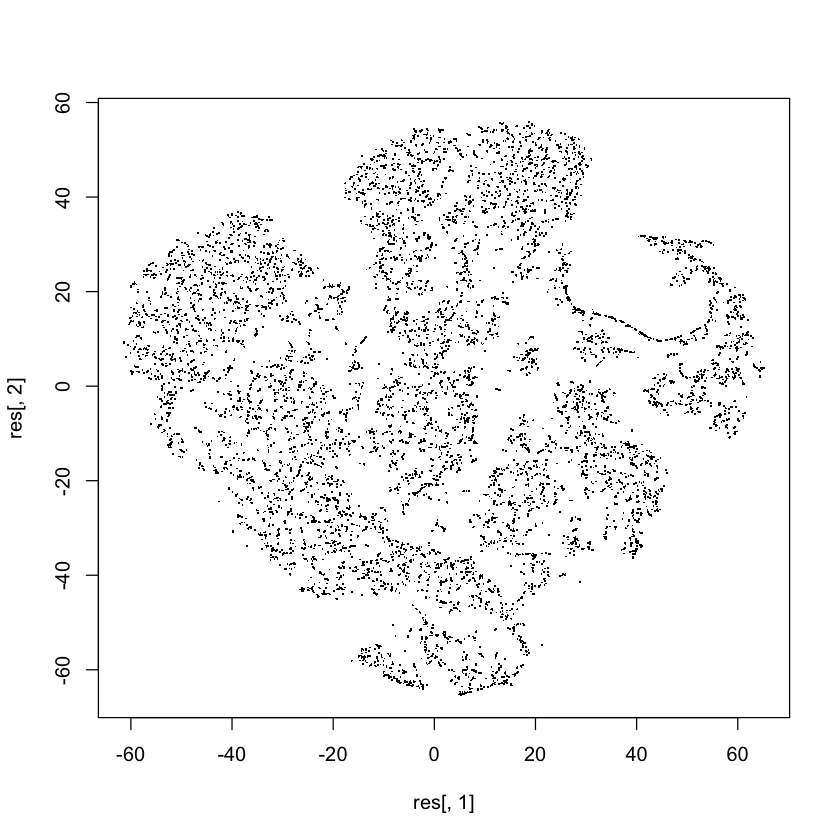

In [8]:
plot(res[,1],res[,2], pch='.')

In [9]:
res <- fftRtsne(as.matrix(x), 
                dims=2, 
                max_iter = 400,
                start_late_exag_iter=300, 
                late_exag_coeff=0.9)

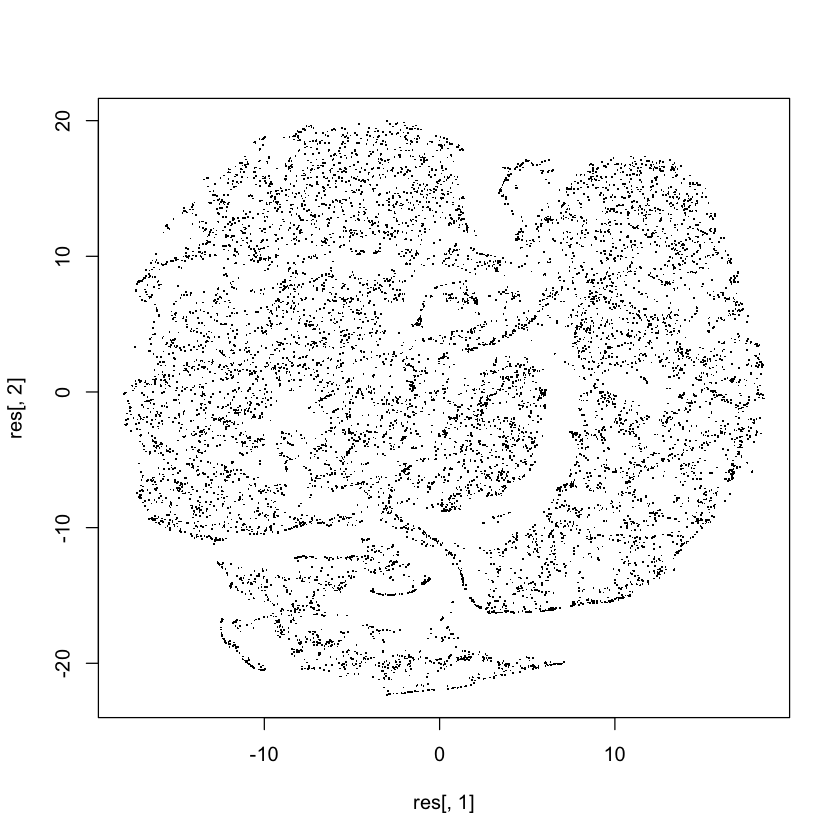

In [10]:
plot(res[,1],res[,2], pch='.')